## Thinking about others and the future: Neural correlates of perspective taking relate to preferences for delayed rewards

Link to original published article <https://link.springer.com/article/10.3758/s13415-017-0550-8>

### BACKGROUND

We infer the thoughts and feelings of others by taking their perspectives. I previously put forward the hypothesis that this same psychological ability is used to understand how we will be affected by future events (O'Connell et al., 2015), by allowing us to take the perspective of our future self. In this project, I tested this idea by examining two hypotheses: 1) if brain responses related to taking the perspectives of others are observed when making decisions for future over immediate rewards 2) if the strength of these brain responses corresponded to individual preferences for future rewards. In a functional magnetic resonance imaging (fMRI) scanner, 36 adults completed a perspective taking “localizer” task, in order to locate each individual's brain region responsible for perspective taking. Both hypotheses were confirmed, providing convergent evidence for the role of the ability to take the perspectives of others, and those that determine preferences in intertemporal choices

### METHODS

### Participants
Thirty-eight adults (21 female, age range 18–34 years, mean age 22.6 years) were recruited and performed the tasks in the following order.

### Perspective taking task
The perspective taking task consisted of 10 short stories each about other people’s beliefs, and in a control condition for a baseline reference point of neural activity, participants were shown historical facts. Each trial started with a blank screen for 12 s, followed by the story for 10 s, and then a question screen for 4 s, which required participants to give a true or false response (see Fig. 1b).

### Intertemporal choice task
In the  intertemporal choice task, participants were informed that rewards were hypothetical and were instructed to not factor in their current financial situation during decision-making. Participants choose at a self-paced rate between a variable amount of money now (<£100), or £100 at one of six randomly selected delays (months: 1, 3, 6, 9, 12, 18). Indifference points, the amount at which participants were indifferent between the immediate and delayed reward, were calculated using the double-limits algorithm. The amount of these indifference-points was how much the participant subjective valued £100 at a given delay. The rate at which rewards were devalued as their delay increased temporal discounting rates were estimated using a hyperbolic function (see below) to this curve, which is known to be good description of the rate at which people discount rewards with delay, where *v* = subjective value of delayed reward, *V* = value of reward without delay (£100), and *D* = delay. 
<center>
\begin{equation*}
f(v) = \frac{{V}}{(1 + kD)}
\end{equation*}
</center>

The rate of this hyperbolic curve (*k*) is positively related to the degree to which individuals' subjectively devalued reward with delay, and hence, was used to estimate the degree to which they preferred future over immediate rewards, and the relationship of this estimate with brain responses related to perspective taking in the rTPJ. 
### fMRI data acquisition and analysis 
Scanning was conducted using a Siemens 3T Trio MRI scanner with an EPI sequence of TR 2 s, TE 30 ms, 2-mm3 voxels, and 37 interleaved 3-mm slices. Using FSL, data were preprocessed according to standard protocols. fMRI measures neural activity in terms of changes in the Blood Oxygenation Level Dependent signal (BOLD). These BOLD response data were submitted to the FSL library package for analysis. The data modelling which FSL uses is based on general linear modelling (GLM), otherwise known as multiple regression. It allows you to describe the experimental design using a matrix; then a model is created that should fit the data, telling you where the brain has activated in response to the stimuli.

<img src="images/figure1.png" alt="Drawing" style="width: 50%;" title="Title text"/>
**Fig.** Example trials of (a)  choice task (b) perspective taking task.

### RESULTS

### Distribution transformation
Estimates of rTPJFB response were log-transformed to reduce the positive skew observed in these data (Kolmogorov–Smirnov test: p = .016 to p > .2 after log transformation; estimates from the lTPJ and precuneus were also log-transformed).

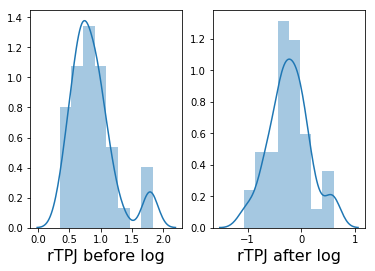

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data to df
filename = 'data/rTPJ_raw.txt'
scan_df = pd.read_table(filename)
rtpj_raw = scan_df.rTPJ

## build subplots
# left subplot
plt.subplot(1, 2, 1)
sns.distplot(rtpj_raw[~np.isnan(rtpj_raw)]);
plt.xlabel('rTPJ before log', fontsize=16)

# right subplot
plt.subplot(1, 2, 2)
rtpj_log = np.log(scan_df.rTPJ) # log transform using numpy
sns.distplot(rtpj_log[~np.isnan(rtpj_log)]);
plt.xlabel('rTPJ after log', fontsize=16)

plt.show()

### Distribution transformation

In the intertemporal choice task, estimates from the rTPJ region identified during the perspective taking task were collected during delayed and immediate reward choices. These estimates were normally distributed (Kolmogorov–Smirnov test, p = .11), but one participant's estimate was identified as an outlier (Tukey’s criteria of 1.5 × IQR) and hence excluded from analysis (see below Figure).

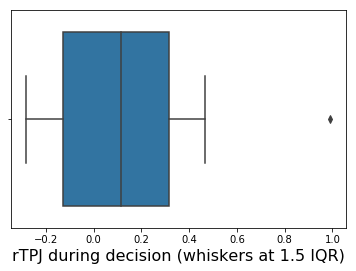

In [15]:
import seaborn as sns
import numpy as np

# import data to df
filename = 'data/TD_imm_min_del.txt'
td_df = pd.read_table(filename)
ax = sns.boxplot(x=td_df[~np.isnan(td_df)])
plt.xlabel('rTPJ during decision (whiskers at 1.5 IQR)', fontsize=16)

plt.show()

### rTPJ response during perspective taking

An iterative threshold-adjusting procedure was used to localize the region of rTPJ showing significantly increased activated during the perspective taking trials relative to the control trials (see below Figure).

<img src="images/rtpj.png" align="left" alt="Drawing" style="width: 30%;" title="Title text" />
<br/><br/><br/><br/><br/><br/><br/><br/> **Fig.** rTPJ region activated during the perspective-taking task. 

### rTPJ response during future and immediate decisions

To test the first hypothesis of whether  brain responses in the rTPJ (in the exact area identified as responding during the perspective-taking task) were higher when future rewards were preferred over immediate rewards, a paired-sampe *t*-test was conducted on response estimates in this region during future vs. immediate choice conditions. A significant difference was found in the direction of DEL > IMM in the rTPJ, n = 25, *t* = -9.51, *p* = 2.65 e<sup>-13</sup> (see below for statistic and Figure).

In [442]:
from scipy import stats
import pandas as pd
import numpy as np

filename = 'data/fig_box_td.csv'
data = pd.read_csv(filename)

stats.ttest_ind(data.IMM,data.DEL)

Ttest_indResult(statistic=-9.5176896367942803, pvalue=2.657951960002261e-13)

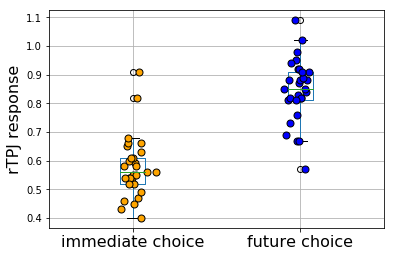

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'data/fig_box_td.csv'
data = pd.read_csv(filename)


# plot box
data.boxplot()

for i,d in enumerate(data):
    y = data[d]
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, mfc = ["orange","blue","yellow"][i], mec='k', ms=7, marker="o", linestyle="None")
    plt.ylabel('rTPJ response', fontsize=16)
    plt.xticks([1, 2], ['immediate choice', 'future choice'], fontsize=16)

### Estimation of individuals' future reward preferences

Individuals' *k* parameter (rate at which rewards were subjectively devalued with increasing delay) was estimated by fitting the hyperbolic curve function to indifference-points (see Methods) using a non-linear least squared minimizing function. This provided a reasonable fit to the observed group-level data (see below Figures of observed and modelled data).

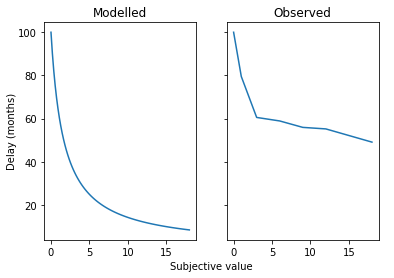

In [18]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import collections
from collections import OrderedDict
orderedDict = collections.OrderedDict()

## function for fitting hyperbolic curve
def tdfunc(D, k):
    return 100/(1 + k*D)

## fit curve to indifference points to estimate k
# declare variables
xdata = [1,3,6,9,12,18]

# import data
filename = 'data/TDindiff.txt'
df = np.loadtxt(filename)

# preallocate k parameter array
karray = np.zeros(df.shape[0])

# lower and upper bounds of k
param_bounds=([0.00000001],[100])

for i in range(len(df)):
    #for row in df   
    ydata = df[i,:]
    # fit curve with least squares minimizing function
    karray[i], pcov = curve_fit(tdfunc, xdata, ydata,bounds=param_bounds)
    
# remove extreme values
rm_outliers = np.nonzero(np.logical_and(karray < 20,karray > .000000001))
meank = karray[rm_outliers].mean()

# declare 
delay_str = ['1','3','6','9','12','18']
delay_num = [0,1,3,6,9,12,18]
df_tdmean = np.mean(df, axis=0)
td_dict = {} #collections.OrderedDict()
df_tdmean = np.hstack((np.zeros([1]),df_tdmean))
df_tdmean[0] = 100

## subplots with shared axis
x = np.linspace(0, 18, 100)
y = 100/(1 + meank*x)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax2.plot(delay_num, df_tdmean)
f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('Subjective value')
plt.ylabel('Delay (months)')
ax1.set_title('Modelled')
ax2.set_title('Observed');

### Relationship between rTPJ response during perspective taking and future choice preferences

To test the second hypothesis of a positive relationship between the strength of brain responses related to perspective taking in the rTPJ, and preferences for future rewards, a Pearson's correlation was conducted between rTPJ estimates during perspective taking, and individuals' *k* parameters. Note *k* parameters were log-transformed to reduce positive skew, a standard procedure for this parameter. A significant negative relationship was observed *r* = -.3, *p* = .0375 (1-tailed).

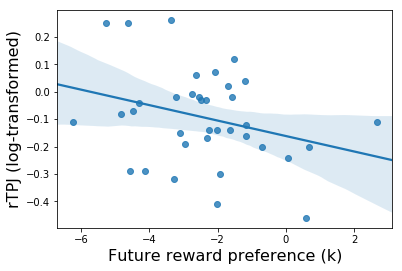

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# create variables
filename = 'data/Fig_scatter.txt'
scan_df = pd.read_table(filename)

# change AuC values to k
scan_df["TD"].values[~np.isnan(scan_df.TD)] = np.log(karray)

# make scatter plot
isnanvec = np.logical_and(~np.isnan(scan_df.rTPJ),~np.isnan(scan_df.TD))
sns.regplot(x=scan_df["TD"], y=scan_df["rTPJ"])
plt.xlabel('Future reward preference (k)', fontsize=16)
plt.ylabel('rTPJ (log-transformed)', fontsize=16)
plt.show()

In [77]:
import numpy as np
from scipy import stats

# run Pearson correlation
print(stats.pearsonr(scan_df["TD"].values[isnanvec], scan_df["rTPJ"].values[isnanvec]))

(-0.29983907117025288, 0.075621675051246423)


### CONCLUSION

In this project, we tested hypotheses which outline how perspective-taking abilities relate to preferences in intertemporal choices. The central ideas was that the subjective value of future rewards relies on the efficacy of taking the perspective of the recipients of those rewards, i.e. future selves. We found two pieces of evidence in support of this view. First, activation in the perspective taking localized rTPJ region was higher when future rewards were preferred over immediate rewards in the intertemporal choice task. Second, people exhibiting a higher rTPJ response during perspective taking demonstrated less steep discounting of future rewards with delay. These findings highlight an intrinsic link between how people make short-term vs. long-term decisions, and their social skills, suggesting that more impulsive individuals are less efficient at understanding the minds of others.